In [1]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

* we work on real data of Airline.
* we analysis the Data of Airline were we want the satifaction result of people for Airline Service.
* we can analyze the data on basis of Gender,Age,Flight Distance ,Food etc.

In [2]:
df = pd.read_csv("Invistico_Airline.csv")

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

##### By using info we check the datatype of perticular column and also check the null values.

In [5]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

* By using this we find the null values in the data .
* so we find the 393 null values in the arriaval delay in minutes .

In [6]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### by describe we find the mean,avg,min,max,count of perticular column.

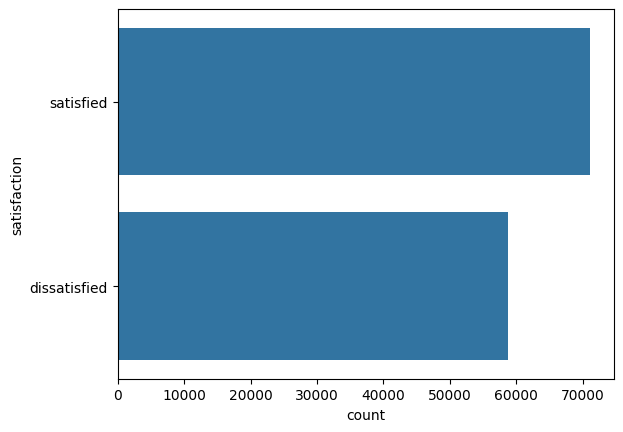

In [7]:
sns.countplot(df["satisfaction"])
plt.show()

* At the end we want result of satisfied and unsatisfied people for Airline Service so from this we clearify the satisfied and unsatisfied people from their service.

In [8]:
df["satisfaction"].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

* From This we clear that 71087 people are satisfied and 58793 people are dissatisfied.

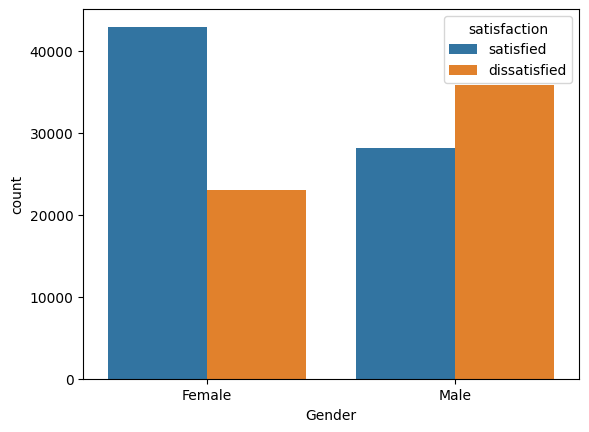

In [9]:
sns.countplot(df, x="Gender", hue="satisfaction")
plt.show()

* We analyze the data on basis of Gender .
* In this plot shows that Female are more satisfied than the male from invistico airline service.

In [10]:
count_age=df["Age"].value_counts()

In [11]:
count_age

Age
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: count, Length: 75, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

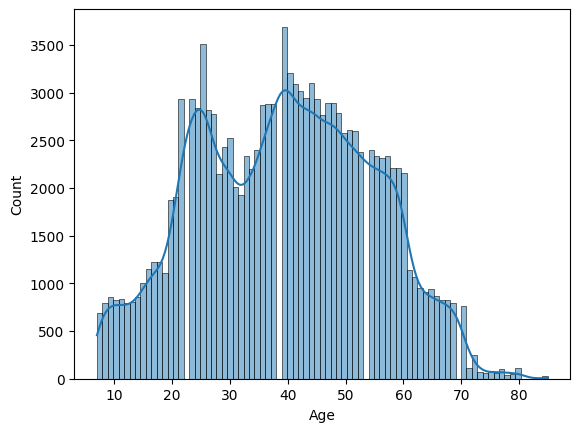

In [12]:
sns.histplot(df["Age"], kde=True)

* On the basis of age we plot the number of people travals according to their age.

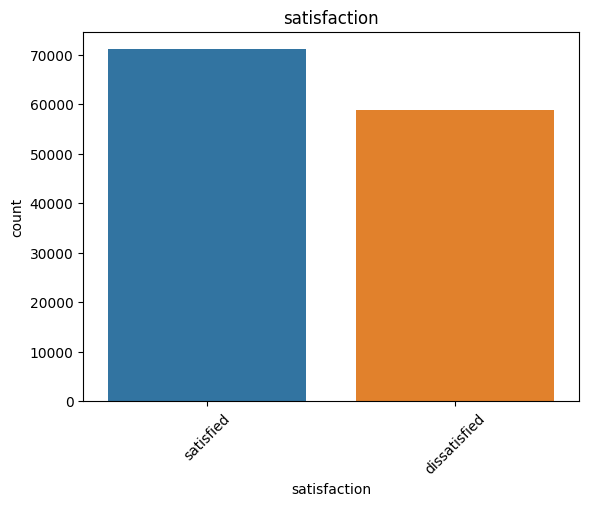

In [13]:
%matplotlib inline

plt.title("satisfaction")
sns.countplot(df,x="satisfaction",hue="satisfaction")
plt.xticks(rotation=45)
plt.show()

In [14]:
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

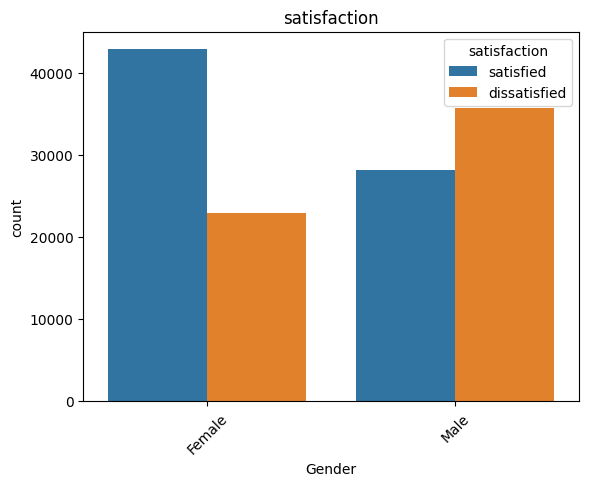

In [15]:
%matplotlib inline

plt.title("satisfaction")
sns.countplot(df,x="Gender",hue="satisfaction")
plt.xticks(rotation=45)
plt.show()

In [16]:
pd.crosstab(columns=df["Gender"],index=df["satisfaction"])

Gender,Female,Male
satisfaction,,
dissatisfied,22971,35822
satisfied,42928,28159


#### By crosstab find the number of satisfied male and female or unsatisfied male and feamale.

In [17]:
df["Class"].value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

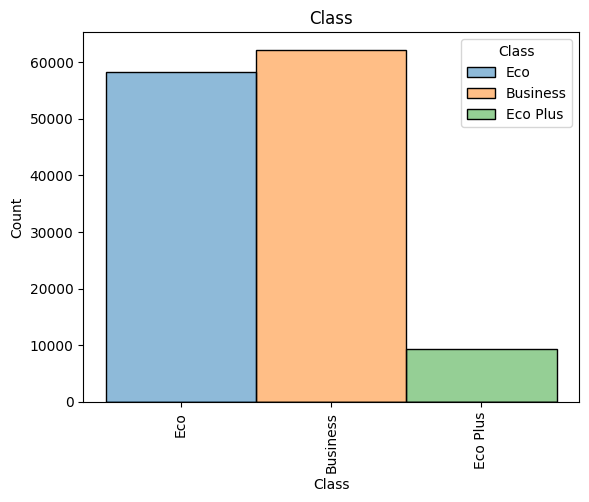

In [18]:
%matplotlib inline
plt.title("Class")
sns.histplot(df,x="Class",hue="Class")
plt.xticks(rotation=90)
plt.show()

* By using This we clear that the the number of people travelling from perticular class.
* In this people travelling from business class are more.
* people travelling from Eco Plus class are less.

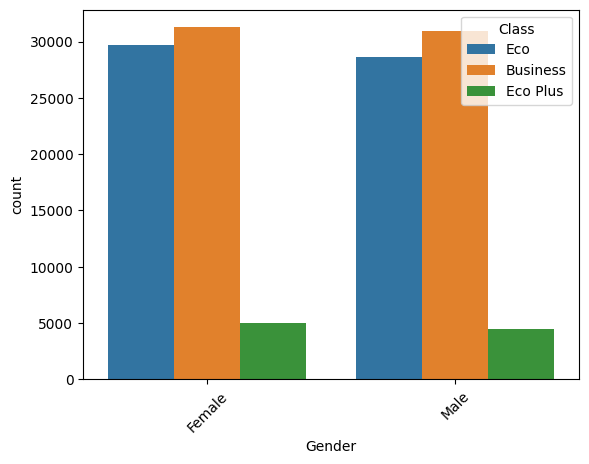

In [19]:
%matplotlib inline

sns.countplot(df,x="Gender",hue="Class")
plt.xticks(rotation=45)
plt.show()

* in above plot shows number of male and female travelling through classes.
* both male and female are more travelling through business class.
* And both male and female are less travelling through eco plus.

In [20]:
pd.crosstab(columns=df["Gender"],index=df["Class"])

Gender,Female,Male
Class,,
Business,31263,30897
Eco,29670,28639
Eco Plus,4966,4445


In [21]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

* By using this we clear that loyal customers are more than disloyal customers.

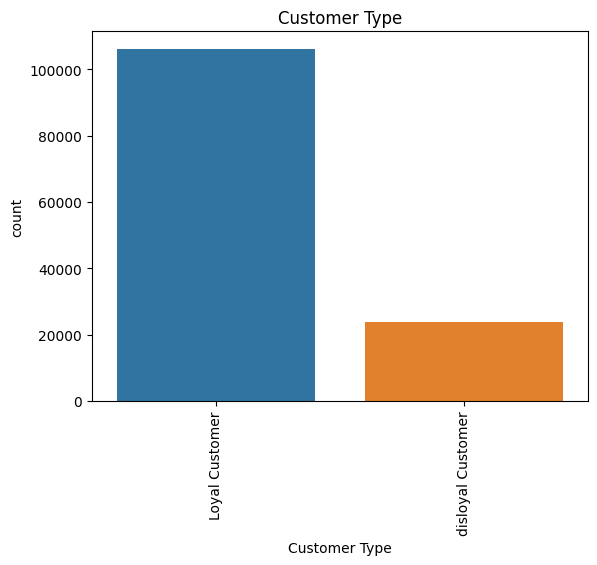

In [22]:
%matplotlib inline
plt.title("Customer Type")
sns.countplot(df,x="Customer Type",hue="Customer Type")
plt.xticks(rotation=90)
plt.show()

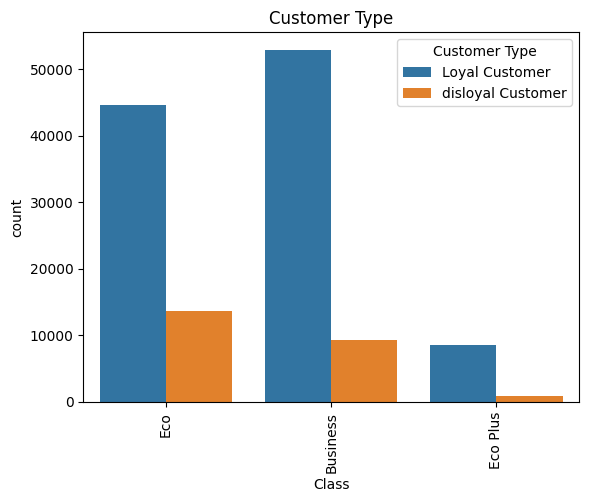

In [23]:
%matplotlib inline
plt.title("Customer Type")
sns.countplot(df,x="Class",hue="Customer Type")
plt.xticks(rotation=90)
plt.show()

* In this plot we shown that customers in the Business class are more loyal.
* the customers in the Eco plus class are less disloyal customers.

In [24]:
pd.crosstab(columns=df["Class"],index=df["Customer Type"])

Class,Business,Eco,Eco Plus
Customer Type,,,
Loyal Customer,52929,44675,8496
disloyal Customer,9231,13634,915


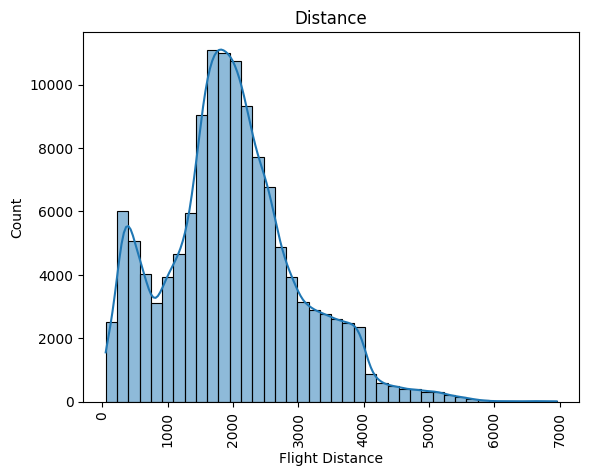

In [25]:
%matplotlib inline
plt.title("Distance")
sns.histplot(df,x="Flight Distance",bins=40,kde=True)
plt.xticks(rotation=90)
plt.show()

* we plot the graph on the basis of Flight Distance travelled by customer .
* In this we clear that the most of the customers travelled between 1500-2000 flight distance.

In [26]:
df["Flight Distance"].value_counts()

Flight Distance
1963    92
1812    88
1639    87
1981    86
1789    86
        ..
4222     1
5049     1
5378     1
5613     1
4260     1
Name: count, Length: 5398, dtype: int64

In [27]:
df["Type of Travel"].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

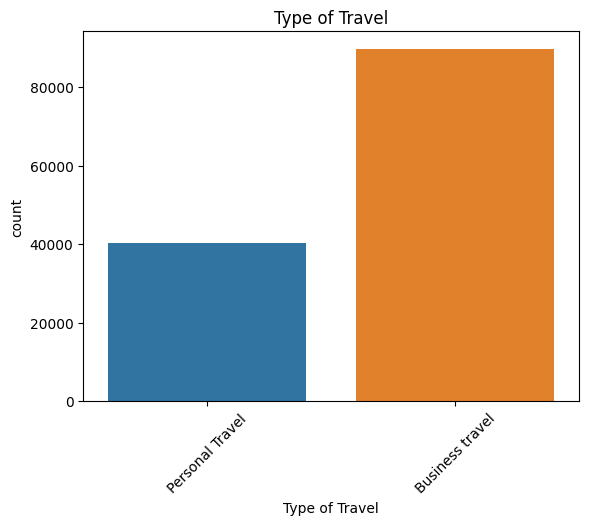

In [28]:

plt.title("Type of Travel")
sns.countplot(df,x="Type of Travel",hue="Type of Travel")
plt.xticks(rotation=45)
plt.show()

* we plot the graph on the basis of Type of travelling of customers.
* By using this we clear that the more customers are travel by the business reason.

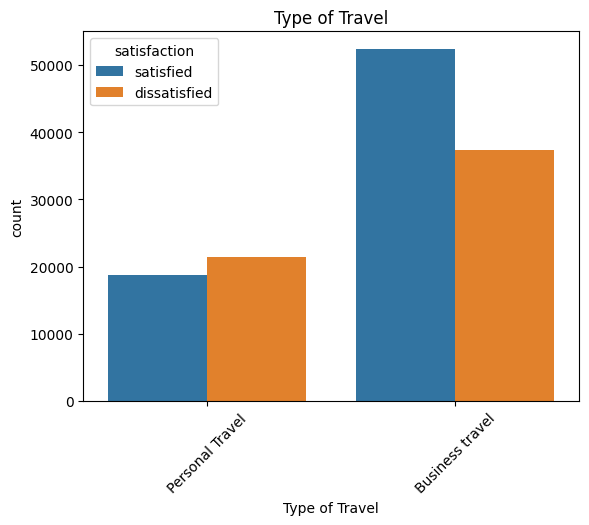

In [29]:
plt.title("Type of Travel")
sns.countplot(df,x="Type of Travel",hue="satisfaction")
plt.xticks(rotation=45)
plt.show()

* By this we clear that business travelled customers are more satisfied.

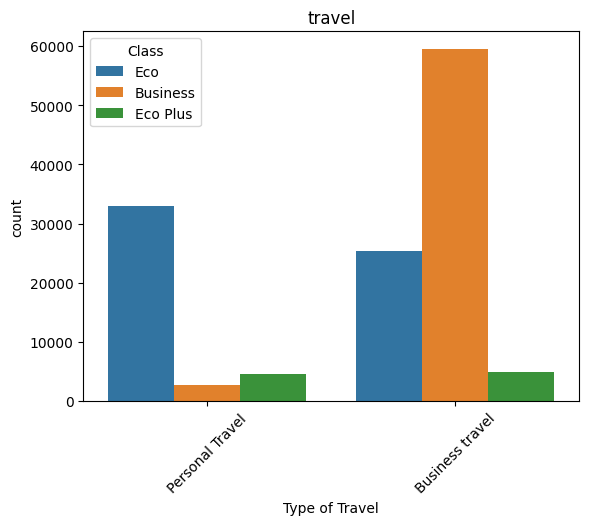

In [30]:
plt.title("travel")
sns.countplot(df,x="Type of Travel",hue="Class")
plt.xticks(rotation=45)
plt.show()

In [31]:
pd.crosstab(columns=df["Type of Travel"],index=df["Class"])

Type of Travel,Business travel,Personal Travel
Class,,
Business,59487,2673
Eco,25304,33005
Eco Plus,4902,4509


* from this counts we clearly show that the people travelled by business reason are travelled through business class 
* and people travelled by personal reason travelled through eco class.

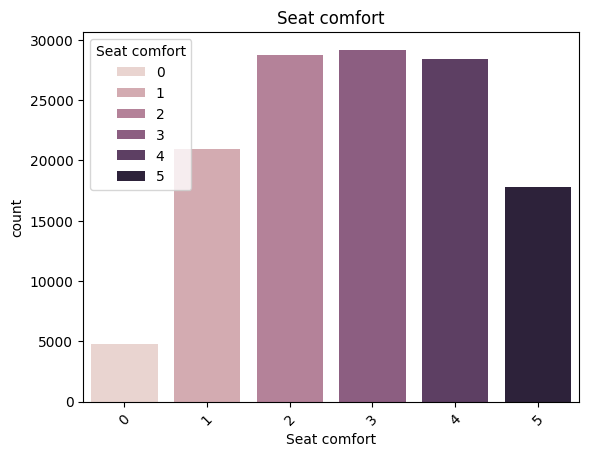

In [32]:
plt.title("Seat comfort")
sns.countplot(df,x="Seat comfort",hue="Seat comfort")
plt.xticks(rotation=45)
plt.show()

* In this we clearly shown that the comfortness of seat rating given by customers that is 0-5.
* so the more customers gives the rating is 3 for seat comfort.

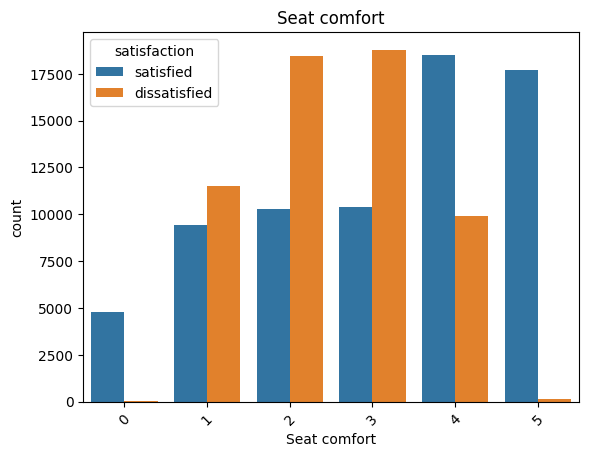

In [33]:
plt.title("Seat comfort")
sns.countplot(df,x="Seat comfort",hue="satisfaction")
plt.xticks(rotation=45)
plt.show()

* In this plot most dissatisfied customers gives 3rd rating to comfort of seat.
* most satisfied customers gives 4th rating to the comfort of seat.

In [34]:
pd.crosstab(columns=df["Seat comfort"],index=df["satisfaction"])

Seat comfort,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,10,11503,18454,18794,9891,141
satisfied,4787,9446,10272,10389,18507,17686


In [35]:
df["Food and drink"].value_counts()

Food and drink
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: count, dtype: int64

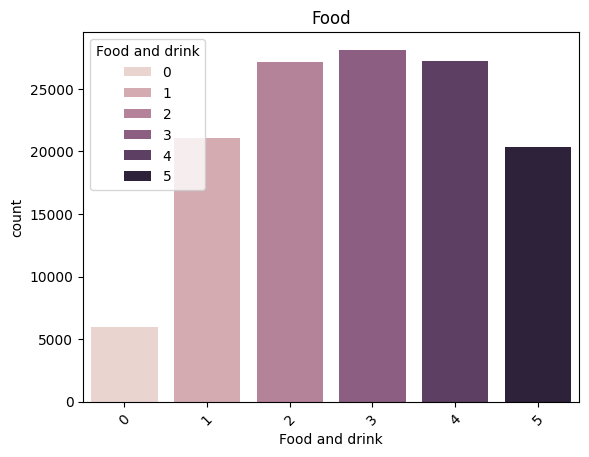

In [36]:
plt.title("Food")
sns.countplot(df,x="Food and drink",hue="Food and drink")
plt.xticks(rotation=45)
plt.show()

* In this plot shown that the rating of food serving by airline from customers.
* the most of the customers gives the rating of 3rd .

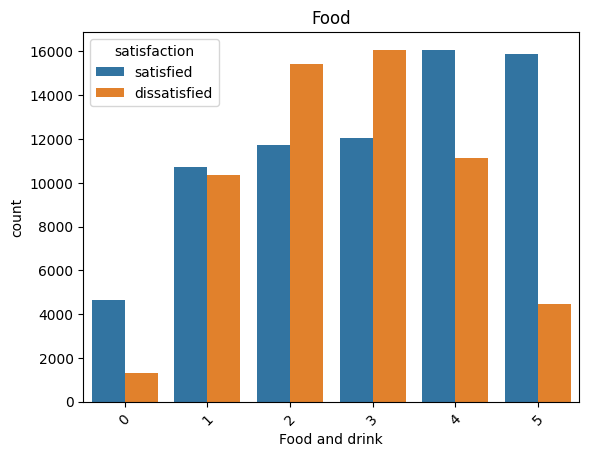

In [37]:
plt.title("Food")
sns.countplot(df,x="Food and drink",hue="satisfaction")
plt.xticks(rotation=45)
plt.show()

In [38]:
df["Departure/Arrival time convenient"].value_counts()

Departure/Arrival time convenient
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: count, dtype: int64

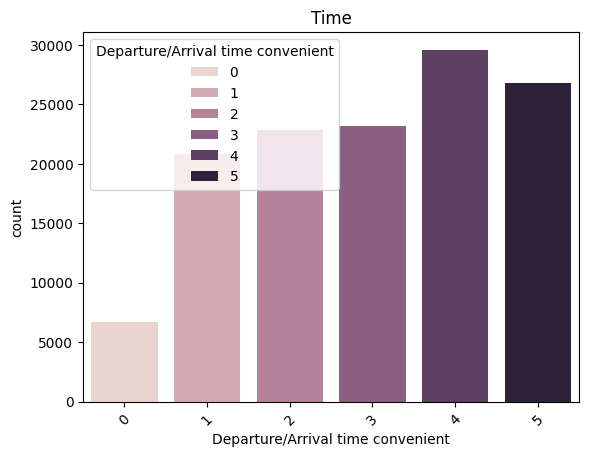

In [39]:
plt.title("Time")
sns.countplot(df,x="Departure/Arrival time convenient",hue="Departure/Arrival time convenient")
plt.xticks(rotation=45)
plt.show()

* In this plot we shown that the departure and arrival time is fit for customers .
* By using this we shown that the around 29593 customers are rated 4 to that time convenient. 

In [40]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [41]:
df["Online support"].value_counts()

Online support
4    41510
5    35563
3    21609
2    17260
1    13937
0        1
Name: count, dtype: int64

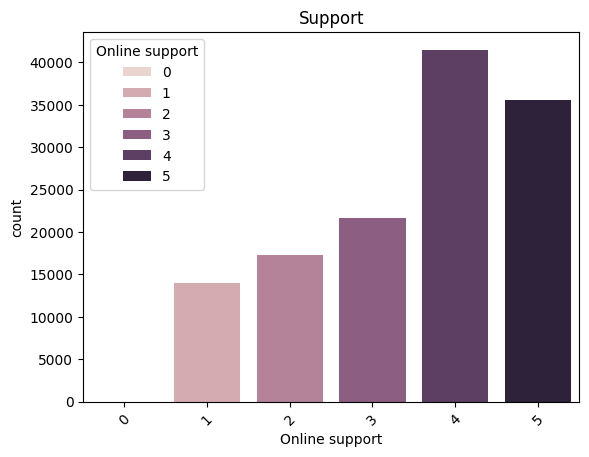

In [42]:
plt.title("Support")
sns.countplot(df,x="Online support",hue="Online support")
plt.xticks(rotation=45)
plt.show()

* In this plot we shown that the ratinging to online support given by customers.
* By using this we clear that most of the customers gives 4th ratings.means then the online service given by airline is good.

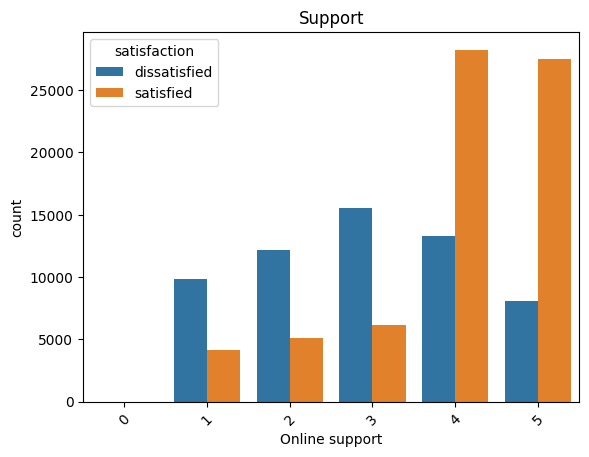

In [43]:
plt.title("Support")
sns.countplot(df,x="Online support",hue="satisfaction")
plt.xticks(rotation=45)
plt.show()

In [44]:
df["Ease of Online booking"].value_counts()

Ease of Online booking
4    39920
5    34137
3    22418
2    19951
1    13436
0       18
Name: count, dtype: int64

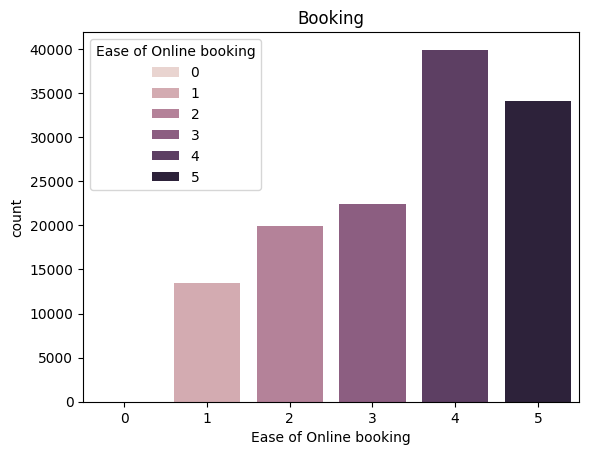

In [45]:
plt.title("Booking")
sns.countplot(df,x="Ease of Online booking",hue="Ease of Online booking")
plt.show()

* In above plot we clear that the rating given by customers to the online booking serive .
* the more people that is 39920 customers gives 4th ratings .

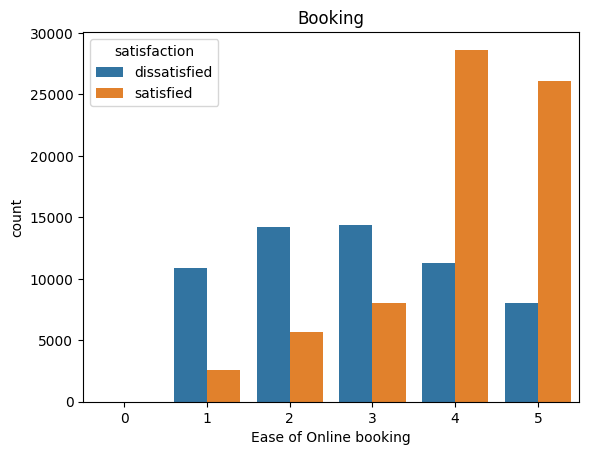

In [46]:
plt.title("Booking")
sns.countplot(df,x="Ease of Online booking",hue="satisfaction")
plt.show()

* Most of the people satisfied by 4th ratings and 5th ratings.

In [47]:
df["On-board service"].value_counts()

On-board service
4    40675
5    31724
3    27037
2    17174
1    13265
0        5
Name: count, dtype: int64

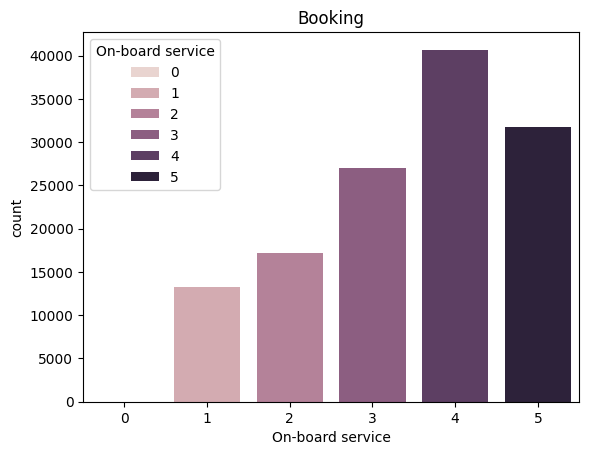

In [48]:
plt.title("Booking")
sns.countplot(df,x="On-board service",hue="On-board service")
plt.show()

* By using this we clear that around 40675 customers gives 4 rating to the on board service.

In [49]:
df["Leg room service"].value_counts()

Leg room service
4    39698
5    34385
3    22467
2    21745
1    11141
0      444
Name: count, dtype: int64

In [50]:
count_age.sort_index()

Age
7     685
8     797
9     859
10    822
11    837
     ... 
77    106
78     44
79     52
80    110
85     25
Name: count, Length: 75, dtype: int64

In [51]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


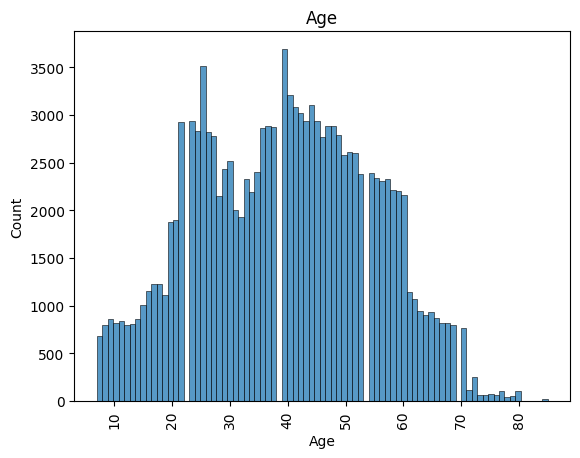

In [52]:
%matplotlib inline
plt.title("Age")
sns.histplot(df,x="Age")
plt.xticks(rotation=90)
plt.show()

<Axes: >

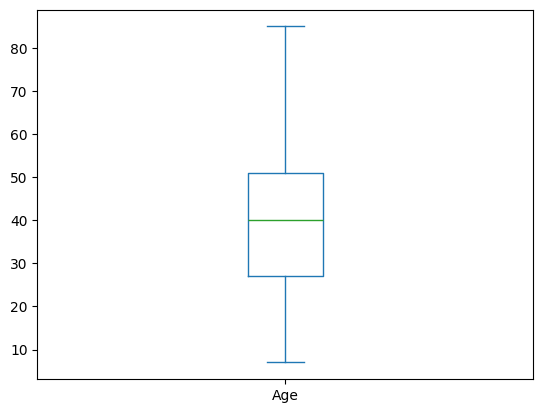

In [53]:
df["Age"].plot.box()

* By using this we find the outlayers in the age column data .
* so we use the boxplot.
* there is no outliers find in the age column

<Axes: >

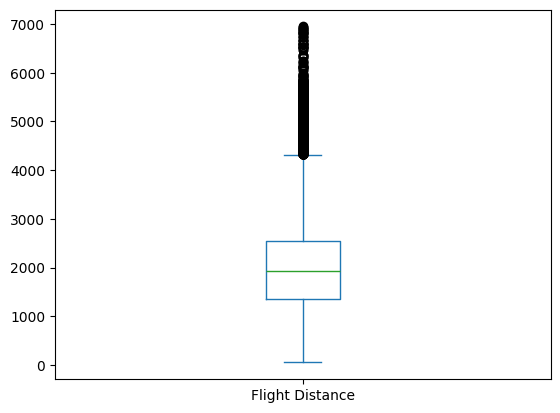

In [54]:
df["Flight Distance"].plot.box()

* By using this we find the outliers in the data.
* outliers are detect by quantile function.

In [55]:
df["Flight Distance"].quantile(0.98)

4316.0

* BY using this we calculate the value where the outliers starts.

<Axes: >

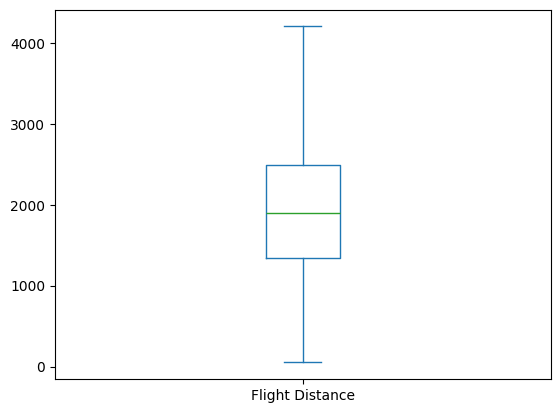

In [56]:
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].plot.box()

* BY using this we remove the outliers in the data by quantile function .

In [57]:
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)].shape

(126896, 23)

* by removing outliers we have to check the shape of the data.

In [58]:
df.shape

(129880, 23)

In [59]:
df=df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126896 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       126896 non-null  object 
 1   Gender                             126896 non-null  object 
 2   Customer Type                      126896 non-null  object 
 3   Age                                126896 non-null  int64  
 4   Type of Travel                     126896 non-null  object 
 5   Class                              126896 non-null  object 
 6   Flight Distance                    126896 non-null  int64  
 7   Seat comfort                       126896 non-null  int64  
 8   Departure/Arrival time convenient  126896 non-null  int64  
 9   Food and drink                     126896 non-null  int64  
 10  Gate location                      126896 non-null  int64  
 11  Inflight wifi service              126896 no

<Axes: >

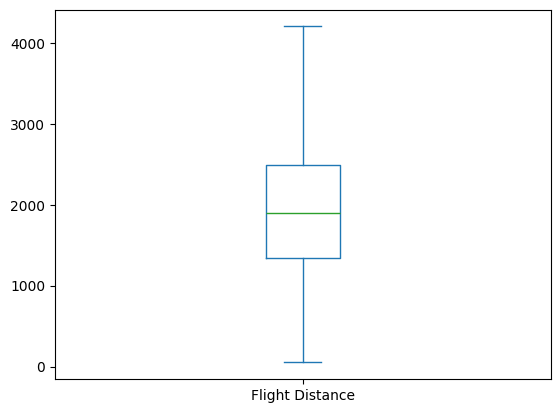

In [61]:
df["Flight Distance"].plot.box()

<Axes: >

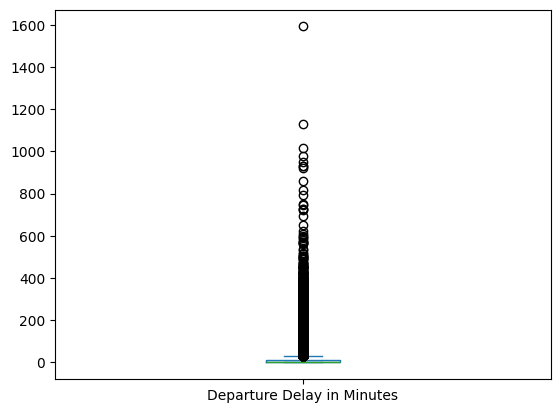

In [62]:
df["Departure Delay in Minutes"].plot.box()

In [63]:
df["Departure Delay in Minutes"].quantile(0.9)

42.0

* also check the outliers in departure delay in minutes by plot box ,and find the range of the outliers by using quantile finction.

<Axes: >

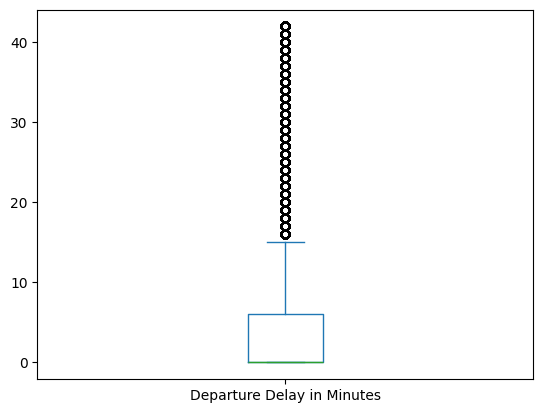

In [64]:
df[df["Departure Delay in Minutes"]<=df["Departure Delay in Minutes"].quantile(0.9)]["Departure Delay in Minutes"].plot.box()

<Axes: ylabel='Frequency'>

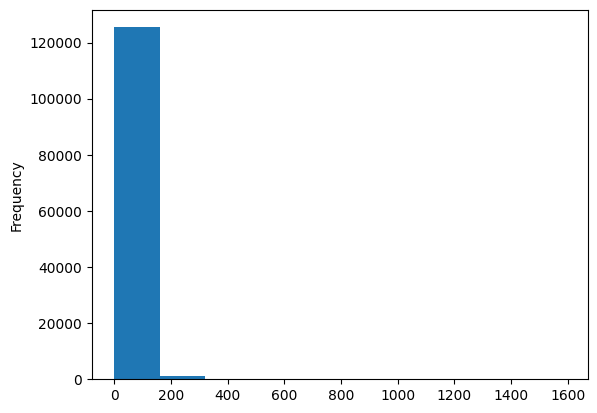

In [65]:
df["Departure Delay in Minutes"].plot.hist()

In [66]:
df[df["Departure Delay in Minutes"]<=df["Departure Delay in Minutes"].quantile(0.9)]["Departure Delay in Minutes"].shape

(114220,)

In [67]:
df=df[df["Departure Delay in Minutes"]<=df["Departure Delay in Minutes"].quantile(0.9)]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114220 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       114220 non-null  object 
 1   Gender                             114220 non-null  object 
 2   Customer Type                      114220 non-null  object 
 3   Age                                114220 non-null  int64  
 4   Type of Travel                     114220 non-null  object 
 5   Class                              114220 non-null  object 
 6   Flight Distance                    114220 non-null  int64  
 7   Seat comfort                       114220 non-null  int64  
 8   Departure/Arrival time convenient  114220 non-null  int64  
 9   Food and drink                     114220 non-null  int64  
 10  Gate location                      114220 non-null  int64  
 11  Inflight wifi service              114220 no

<Axes: >

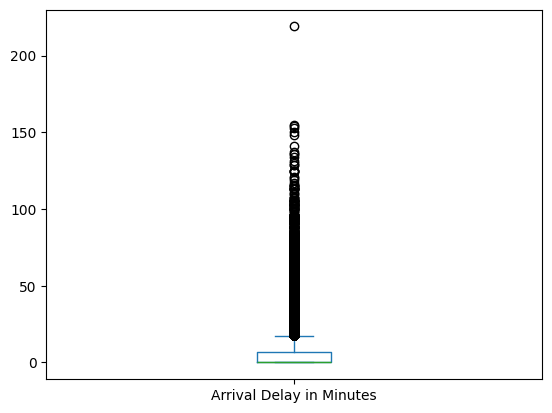

In [69]:
df["Arrival Delay in Minutes"].plot.box()

<Axes: >

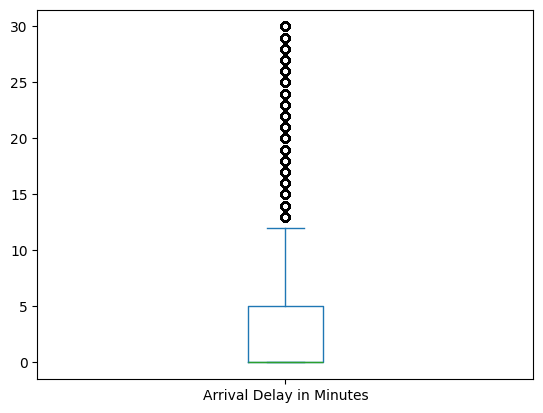

In [70]:
df[df["Arrival Delay in Minutes"]<=df["Arrival Delay in Minutes"].quantile(0.95)]["Arrival Delay in Minutes"].plot.box()

In [71]:
df[df["Arrival Delay in Minutes"]<=df["Arrival Delay in Minutes"].quantile(0.95)]["Arrival Delay in Minutes"].shape

(108465,)

In [72]:
df=df[df["Arrival Delay in Minutes"]<=df["Arrival Delay in Minutes"].quantile(0.95)]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108465 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       108465 non-null  object 
 1   Gender                             108465 non-null  object 
 2   Customer Type                      108465 non-null  object 
 3   Age                                108465 non-null  int64  
 4   Type of Travel                     108465 non-null  object 
 5   Class                              108465 non-null  object 
 6   Flight Distance                    108465 non-null  int64  
 7   Seat comfort                       108465 non-null  int64  
 8   Departure/Arrival time convenient  108465 non-null  int64  
 9   Food and drink                     108465 non-null  int64  
 10  Gate location                      108465 non-null  int64  
 11  Inflight wifi service              108465 no

In [74]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [75]:
pd.get_dummies(df["Gender"])

,Female,Male
0,True,False
2,True,False
3,True,False
4,True,False
5,False,True
...,...,...
129869,True,False
129871,True,False
129872,True,False
129874,True,False


In [76]:
pd.get_dummies(df["Gender"],dtype="int")

,Female,Male
0,1,0
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
129869,1,0
129871,1,0
129872,1,0
129874,1,0


#### get dummies are use for to convert catgorical value into dummies means 0 or 1.

In [77]:
pd.get_dummies(df["Gender"],dtype="int",drop_first=True)

,Male
0,0
2,0
3,0
4,0
5,1
...,...
129869,0
129871,0
129872,0
129874,0


* By using this we convert string into int type data .this is called encoding .
* Gender column is nominal encoder so By using this method we convert categorical value into numrical.

In [78]:
df["Male"]=pd.get_dummies(df["Gender"],dtype="int",drop_first=True)

In [79]:
df[["Gender","Male"]]

,Gender,Male
0,Female,0
2,Female,0
3,Female,0
4,Female,0
5,Male,1
...,...,...
129869,Female,0
129871,Female,0
129872,Female,0
129874,Female,0


In [80]:
df.drop("Gender",axis=1,inplace=True)

In [81]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Male
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,5,4,5,5,4,2,0,0.0,1


In [82]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [83]:
df["Loyal_Customer"]=list(map(lambda x: 1 if x[0]=="L"else 0,df["Customer Type"]))

In [84]:
df[["Customer Type","Loyal_Customer"]]

,Customer Type,Loyal_Customer
0,Loyal Customer,1
2,Loyal Customer,1
3,Loyal Customer,1
4,Loyal Customer,1
5,Loyal Customer,1
...,...,...
129869,disloyal Customer,0
129871,disloyal Customer,0
129872,disloyal Customer,0
129874,disloyal Customer,0


* Customer Type is categorical value so we have to convert in into numerical value.
* so by using this lambda function we convert Loyal customer and dissloyal customers into 0 and 1 value.

In [85]:
df.drop("Customer Type",axis=1,inplace=True)

In [86]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [87]:
df["Type of Travel"]=list(map(lambda x: 1 if x[0]=="P"else 0,df["Type of Travel"]))

In [88]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Loyal_Customer
0,satisfied,65,1,Eco,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,Eco,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,Eco,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,Eco,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,Eco,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


* In a same way we are convert the Type of travel column data into 0 and 1 numerical value.

In [89]:
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le=LabelEncoder()

#### label encoder is use for ordinary encoder means if the data is in order format then to covert into numeric value we use label encoder.

In [92]:
le.fit_transform(df["Class"])

array([1, 1, 1, ..., 1, 1, 1])

#### here label encoder fit and transform in the class.

In [93]:
df["Class"]=le.fit_transform(df["Class"])

* Class column data is ordinary encoder means this data is in order form so we have use labelencoder method.
* By using this we convert eco, ecoplus, business class into number values. 

In [94]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Loyal_Customer
0,satisfied,65,1,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,1,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [95]:
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [96]:
x=df.drop("satisfaction",axis=1)
y=df["satisfaction"]

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=98)

In [99]:
from sklearn.linear_model import LogisticRegression

#### For calculate the prdicted value we apply logistic Regression.
#### basically Logistic Regression apply on multiclass classification function so we can apply this Algorithm.
#### we fit the model into train data.

In [100]:
model=LogisticRegression()

In [101]:
model.fit(x_train,y_train)

LogisticRegression()

In [102]:
y_pred=model.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [104]:
accuracy_score(y_test,y_pred)

0.796990817568315

In [105]:
confusion_matrix(y_test,y_pred)

array([[ 8815,  3018],
       [ 2487, 12797]], dtype=int64)

* confusion matrix shows the value of true positive ,false negative, false positive, true negative .
* so in this true positive is 8815 , false negative is 3018, false positive is 2487, true negative is 12797.
* where the people are actually not satisfied but model shows that people are satisfied...this is error which is type 1 error that is false positive 

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

dissatisfied       0.78      0.74      0.76     11833
   satisfied       0.81      0.84      0.82     15284

    accuracy                           0.80     27117
   macro avg       0.79      0.79      0.79     27117
weighted avg       0.80      0.80      0.80     27117



* Classification report that is precision, Recall, F1-score based on false postive and false negative.
* In this model false positive is important so precision is important to this model.

In [107]:
model.score(x_train,y_train)

0.7951025224959434

* By applying the Logistic Regression the model score is 79%.
* first we define the output column of this model.
* so by using method of train test split we calculate the predicted value of this model .
* And then compare the actual result and predicted result.
* By this comparison we can calculate the accuracy score,confusion matrics,and the score of this model.

In [108]:
from sklearn.tree import DecisionTreeClassifier

#### To increasing the model accuracy score we can apply Dicision treeclassifier using gridsearch cv.
#### so import the DecisionTreeClassifier from sklearn.
#### fit the model into train data.

In [110]:
model=DecisionTreeClassifier()

In [111]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [112]:
model.score(x_train,y_train)

1.0

In [113]:
y_predict=model.predict(x_test)

In [114]:
accuracy_score(y_test,y_predict)

0.9346166611350814

#### By applying decision tree model we have got the accuracy of 93%.
#### we got the training score is high an testing score is less so this model wiil be overfitting so we have clear the overfitting we use hyperparameter tunning.

In [115]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [116]:
params={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5],
    "max_features":list(range(1,30)),
    "min_samples_split":[1,2,3,4,5]
}
dtc=DecisionTreeClassifier()

In [117]:
from sklearn.model_selection import train_test_split,GridSearchCV

#### we apply the gridsearch cv which is the technique of hyperparameter tunning.
#### In this we have give the parameters and gridsearch cv check this parameter one by one.

In [118]:
gscv=GridSearchCV(
    estimator=dtc,
    param_grid=params,
    cv=10,
    n_jobs=-1,
    verbose=1
)

In [119]:
gscv.fit(x_train,y_train)

Fitting 10 folds for each of 1450 candidates, totalling 14500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             verbose=1)

In [120]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 14,
 'min_samples_split': 5}

#### from the given params gscv select the best parameters and we have to fit this parameters in new model on training data for best accuracy.

In [121]:
gscv.best_score_

0.882320277938265

In [132]:
new_model=DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features=14,min_samples_split=5)

In [133]:
new_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=14,
                       min_samples_split=5)

In [134]:
new_model.score(x_train,y_train)

0.8738874956974971

#### model score of gscv is 87%. 

In [135]:
new_y_predict=new_model.predict(x_test)

In [136]:
accuracy_score(y_test,new_y_predict)

0.8745067669727478

#### By using grid search cv we have got best accuracy score that is 87%.

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [138]:
scaler = StandardScaler()

In [139]:
x_train=scaler.fit_transform(x_train)

In [140]:
x_test=scaler.transform(x_test)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

##### Apply the support vector machine and KNN algorithm on model to check the accuracy.

In [142]:
svc=SVC(kernel="linear")
psvc = SVC(kernel="poly", degree=2)
knn = KNeighborsClassifier(n_neighbors=7)

#### svc kernal are 4 types out of this we apply two kernal that is linear and polynimial kernal 
#### polynimial kernal are use for nonlinear seperable data.
#### kernal function are use for to trasform nonlinear data into linear data.

In [143]:
svc.fit(x_train, y_train)
psvc.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [144]:
print("SVC Linear Score", svc.score(x_train, y_train))
print("SVC Poly Score", psvc.score(x_train, y_train))
print("KNN Score", knn.score(x_train, y_train))

SVC Linear Score 0.8404263165658652
SVC Poly Score 0.9049392732458081
KNN Score 0.9381423022077986


In [145]:
print("SVC Linear Accuracy", accuracy_score(y_test, svc.predict(x_test)))
print("SVC Poly Accuracy", accuracy_score(y_test, psvc.predict(x_test)))
print("KNN Accuracy", accuracy_score(y_test, knn.predict(x_test)))

SVC Linear Accuracy 0.8396209020171848
SVC Poly Accuracy 0.9034553969834421
KNN Accuracy 0.9203451709259873


#### we can get accuracy of all model out of this KNN gives us best accuracy.

In [ ]:
import joblib as jb

In [ ]:
jb.dump(knn, "project airline.pkl")